In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
!unzip /kaggle/input/facial-keypoints-detection/training.zip
!unzip /kaggle/input/facial-keypoints-detection/test.zip

Archive:  /kaggle/input/facial-keypoints-detection/training.zip
  inflating: training.csv            
Archive:  /kaggle/input/facial-keypoints-detection/test.zip
  inflating: test.csv                


### read data

In [3]:
train_data = pd.read_csv('/kaggle/working/training.csv')
test_data = pd.read_csv('/kaggle/working/test.csv')
test_data

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...


In [4]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [5]:
train_data.fillna(method = 'ffill' , inplace = True)

In [6]:
train_data.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [7]:
def process_img(data):
    images = []
    for idx, sample in data.iterrows():
        image = np.array(sample['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255.
    return images

def keypoints(data):
    keypoint = data.drop('Image',axis = 1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features

In [8]:
x_train = process_img(train_data)
y_train = keypoints(train_data)

In [9]:
y_test = test_data.Image

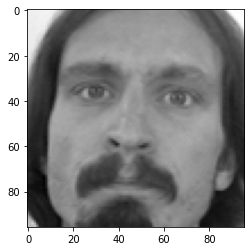

In [10]:
plt.imshow(x_train[0],cmap='gray')
plt.show()

### CNN model

In [11]:
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', input_shape=(96, 96, 1)),
    layers.LeakyReLU(),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.LeakyReLU(),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.LeakyReLU(),
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(128),
    layers.ReLU(),
    layers.Dense(96),
    layers.ReLU(),
    layers.Dense(64),
    layers.ReLU(),
    layers.Dense(30)
])

model.compile(optimizer='adam',loss='huber_loss',metrics=['accuracy'])

2023-02-08 18:12:51.417561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 18:12:51.418474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 18:12:51.543092: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 18:12:51.543892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 18:12:51.544590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [12]:
model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split = 0.15)

2023-02-08 18:12:55.777807: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-02-08 18:12:57.800503: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


24/24 [==============================] - 16s 220ms/step - loss: 28.1965 - accuracy: 0.0915 - val_loss: 37.7723 - val_accuracy: 0.0028
Epoch 2/50
24/24 [==============================] - 4s 162ms/step - loss: 10.3771 - accuracy: 0.2572 - val_loss: 39.5796 - val_accuracy: 0.0803
Epoch 3/50
24/24 [==============================] - 4s 159ms/step - loss: 4.7943 - accuracy: 0.4457 - val_loss: 34.1502 - val_accuracy: 0.3809
Epoch 4/50
24/24 [==============================] - 4s 160ms/step - loss: 3.2869 - accuracy: 0.5336 - val_loss: 26.6136 - val_accuracy: 0.5671
Epoch 5/50
24/24 [==============================] - 4s 160ms/step - loss: 3.0592 - accuracy: 0.6027 - val_loss: 23.3573 - val_accuracy: 0.6389
Epoch 6/50
24/24 [==============================] - 4s 160ms/step - loss: 2.4875 - accuracy: 0.6543 - val_loss: 18.8288 - val_accuracy: 0.6531
Epoch 7/50
24/24 [==============================] - 4s 162ms/step - loss: 2.6572 - accuracy: 0.6755 - val_loss: 16.9258 - val_accuracy: 0.6588
Epoch 8

In [13]:
y_test = process_img(test_data)

In [14]:
predections = model.predict(y_test)

In [15]:
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='o', s=20, color='r')
    plt.title(title)

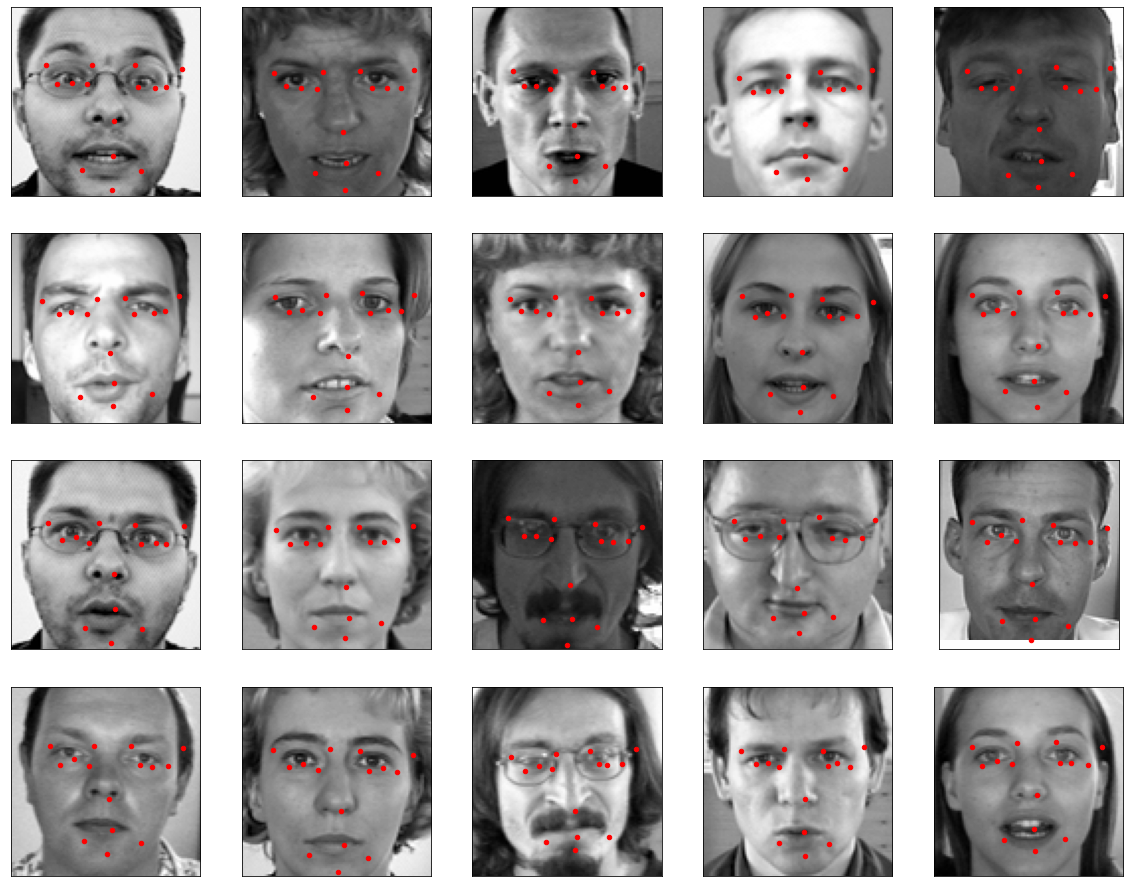

In [16]:
fig = plt.figure(figsize=(20,16))
for i in range(20):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(y_test[i], predections[i], axis, "")
plt.show()

In [17]:
SampleSubmission = pd.read_csv('/kaggle/input/facial-keypoints-detection/SampleSubmission.csv')
lookup = pd.read_csv('/kaggle/input/facial-keypoints-detection/IdLookupTable.csv')

In [18]:
feature = list(lookup['FeatureName'])
image_ids = list(lookup['ImageId']-1)
row_ids = lookup['RowId']
pre_list = list(predections)

feature_list = []
for f in feature:
    feature_list.append(feature.index(f))

final_preds = []
for x,y in zip(image_ids, feature_list):
    final_preds.append(pre_list[x][y])
    
row_ids = pd.Series(row_ids, name = 'RowId')
locations = pd.Series(final_preds, name = 'Location')
locations = locations.clip(0.0,96.0)

submission_result = pd.concat([row_ids,locations],axis = 1)
submission_result

,RowId,Location
0,1,72.573219
1,2,40.856560
2,3,30.565958
3,4,38.132675
4,5,64.377235
...,...,...
27119,27120,40.544979
27120,27121,51.459572
27121,27122,70.377419
27122,27123,51.011860


In [19]:
submission_result.to_csv('submission.csv',index = False)